### MinMax Pipeline ###

In [1]:
## loading useful stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("Use_This.csv", index_col=0, header=0)
data.head()

,Year,Assigned_ID,Bank,IncRat,UPB,LTV,MortDate,Purpose,Coop,Product,...,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier,Portfolio_Worthy
0,2016,2004452,Atlanta,1.5112,383368,0.84,2015,2,2,1,...,1.526,1.61,1.0,0.879,1.0,2.019,1.76,1.0,7.673938,0
1,2016,2004453,Atlanta,0.7347,112822,0.76,2015,2,2,1,...,1.000,1.61,1.0,0.879,1.0,1.000,1.76,1.0,2.490734,0
2,2016,2004454,Atlanta,0.8536,125345,1.00,2015,1,2,1,...,2.846,1.00,1.0,0.879,1.0,2.019,1.76,1.0,8.889406,0
3,2016,2004455,Atlanta,1.4262,162084,1.03,2015,1,2,1,...,2.846,1.00,1.0,0.879,1.0,1.431,1.76,1.0,6.300515,0
4,2016,2004456,Atlanta,2.0272,396490,0.89,2015,1,2,1,...,2.348,1.00,1.0,0.879,1.0,1.431,1.76,1.0,5.198036,0


In [2]:
# Splitting data into target/data variables

target = data.Portfolio_Worthy
data_year = data.Year
data_assigned = data.Assigned_ID
data_bank = data.Bank
data_mortdate = data.MortDate
data = data.drop(columns=['Year','Assigned_ID','Bank','MortDate','Portfolio_Worthy','IncRat','UPB','LTV','Purpose','Coop','Product','Occup','Back','BoCreditScor','PropType','FedGuar','Front'], axis=1)

In [3]:
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
0,1.526,1.61,1.0,0.879,1.0,2.019,1.76,1.0,7.673938
1,1.000,1.61,1.0,0.879,1.0,1.000,1.76,1.0,2.490734
2,2.846,1.00,1.0,0.879,1.0,2.019,1.76,1.0,8.889406
3,2.846,1.00,1.0,0.879,1.0,1.431,1.76,1.0,6.300515
4,2.348,1.00,1.0,0.879,1.0,1.431,1.76,1.0,5.198036


#### Outliers ####

__There are no outliers, since everything is binned for the features.__

#### Normalization ####

In [4]:
# Checking the mean
data.mean()

LTV_M              1.057208
Purpose_M          1.338671
Coop_M             1.000000
Product_M          0.879000
Occup_M            1.005951
Back_M             1.362326
BoCreditScor_M     1.313974
PropType_M         1.009082
Loan_Multiplier    2.479194
dtype: float64

#### Skewness ####

In [5]:
# Checking Skewness
data.skew()

LTV_M               1.041582
Purpose_M          -0.222157
Coop_M              0.000000
Product_M           0.000000
Occup_M             6.935553
Back_M              0.752510
BoCreditScor_M      2.379448
PropType_M         12.122335
Loan_Multiplier     4.242346
dtype: float64

__These skew values all look good. 'PropType_M' and 'Occup_M' are categorical variables, so I do not have to change the skew for them.__

In [6]:
# Printing the data
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier
0,1.526,1.61,1.0,0.879,1.0,2.019,1.76,1.0,7.673938
1,1.000,1.61,1.0,0.879,1.0,1.000,1.76,1.0,2.490734
2,2.846,1.00,1.0,0.879,1.0,2.019,1.76,1.0,8.889406
3,2.846,1.00,1.0,0.879,1.0,1.431,1.76,1.0,6.300515
4,2.348,1.00,1.0,0.879,1.0,1.431,1.76,1.0,5.198036


In [7]:
# Concatinting the target back to the data set
data = pd.concat([data, target], axis=1, join='inner')
data = pd.concat([data, data_year], axis=1, join='inner')
data = pd.concat([data, data_bank], axis=1, join='inner')
data = pd.concat([data, data_mortdate], axis=1, join='inner')
data = pd.concat([data, data_assigned], axis=1, join='inner')
data.head()

,LTV_M,Purpose_M,Coop_M,Product_M,Occup_M,Back_M,BoCreditScor_M,PropType_M,Loan_Multiplier,Portfolio_Worthy,Year,Bank,MortDate,Assigned_ID
0,1.526,1.61,1.0,0.879,1.0,2.019,1.76,1.0,7.673938,0,2016,Atlanta,2015,2004452
1,1.000,1.61,1.0,0.879,1.0,1.000,1.76,1.0,2.490734,0,2016,Atlanta,2015,2004453
2,2.846,1.00,1.0,0.879,1.0,2.019,1.76,1.0,8.889406,0,2016,Atlanta,2015,2004454
3,2.846,1.00,1.0,0.879,1.0,1.431,1.76,1.0,6.300515,0,2016,Atlanta,2015,2004455
4,2.348,1.00,1.0,0.879,1.0,1.431,1.76,1.0,5.198036,0,2016,Atlanta,2015,2004456


In [8]:
# Exporting data to csv file
data.to_csv("MinMax.csv", sep=',')

#### Correlation ####

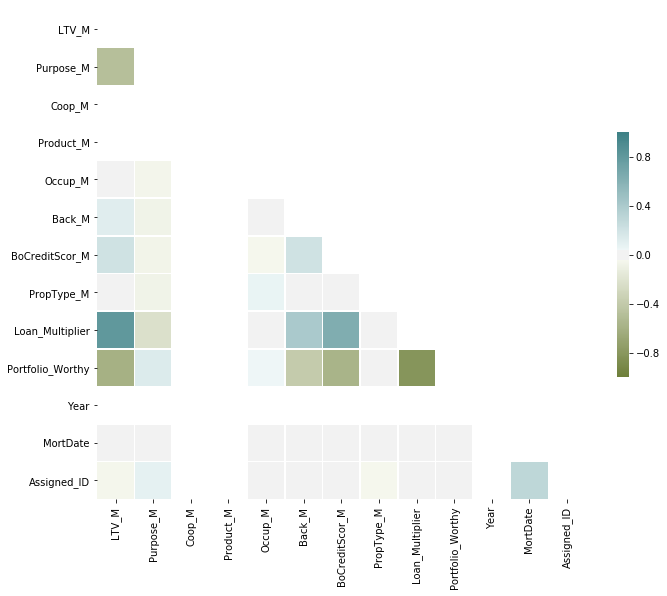

In [9]:
# Checking if the correlation changed
### WE ARE USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [10]:
# Numerical correlation
print(data.corr(method='spearman'))

                     LTV_M  Purpose_M  Coop_M  Product_M   Occup_M    Back_M  \
LTV_M             1.000000  -0.478570     NaN        NaN -0.026822  0.120138   
Purpose_M        -0.478570   1.000000     NaN        NaN -0.055468 -0.071743   
Coop_M                 NaN        NaN     NaN        NaN       NaN       NaN   
Product_M              NaN        NaN     NaN        NaN       NaN       NaN   
Occup_M          -0.026822  -0.055468     NaN        NaN  1.000000 -0.002339   
Back_M            0.120138  -0.071743     NaN        NaN -0.002339  1.000000   
BoCreditScor_M    0.204184  -0.068434     NaN        NaN -0.042322  0.207451   
PropType_M       -0.020178  -0.076600     NaN        NaN  0.064162  0.038781   
Loan_Multiplier   0.806853  -0.222922     NaN        NaN -0.018882  0.410346   
Portfolio_Worthy -0.596335   0.136065     NaN        NaN  0.044293 -0.389334   
Year                   NaN        NaN     NaN        NaN       NaN       NaN   
MortDate         -0.002570   0.019498   